In [1]:
import pandas as pd
import numpy as np
import math
import sqlite3
from unidecode import unidecode
pd.set_option('display.max_rows', 500)
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
import matplotlib.pyplot as plt

In [2]:
off_df = pd.read_csv("/Users/thibaultrolland/Projects/arcom/data/en.openfoodfacts.org.products.csv", sep='\t')

/var/folders/cf/xcc222mj0yg3dzy7mljbx99w0000gn/T/ipykernel_39805/1753992998.py:1: DtypeWarning: Columns (0,9,15,21,22,23,29,30,31,32,33,42,44,50,54,65,70,148) have mixed types. Specify dtype option on import or set low_memory=False.
  off_df = pd.read_csv("/Users/thibaultrolland/Projects/arcom/data/en.openfoodfacts.org.products.csv", sep='\t')


# Summary and data import

## Openfoodfacts

In [3]:
off_df.columns



Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'last_modified_by',
       'product_name', 'abbreviated_product_name',
       ...
       'glycemic-index_100g', 'water-hardness_100g', 'choline_100g',
       'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g',
       'carnitine_100g', 'sulphate_100g', 'nitrate_100g', 'acidity_100g'],
      dtype='object', length=204)

In [4]:
off_df.sample(25)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
2126734,5601009977673,http://world-en.openfoodfacts.org/product/5601...,kiliweb,1550018898,2019-02-13T00:48:18Z,1701775347,2023-12-05T11:22:27Z,mr1skills89,Água de nascente,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2701607,8414807534262,http://world-en.openfoodfacts.org/product/8414...,kiliweb,1526206081,2018-05-13T10:08:01Z,1698342594,2023-10-26T17:49:54Z,teolemon,Fuet,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2166523,5904210060104,http://world-en.openfoodfacts.org/product/5904...,foodvisor,1657183840,2022-07-07T08:50:40Z,1657183840,2022-07-07T08:50:40Z,foodvisor,Ciabatta wege,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553832,628678090125,http://world-en.openfoodfacts.org/product/0628...,kiliweb,1654445181,2022-06-05T16:06:21Z,1654445185,2022-06-05T16:06:25Z,kiliweb,Bulles fusion Fraise,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025506,2452622050259,http://world-en.openfoodfacts.org/product/2452...,kiliweb,1540307286,2018-10-23T15:08:06Z,1693251414,2023-08-28T19:36:54Z,roboto-app,Mini jambon doré au four,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522032,04656700304,http://world-en.openfoodfacts.org/product/0465...,org-database-usda,1587647667,2020-04-23T13:14:27Z,1587647667,2020-04-23T13:14:27Z,org-database-usda,Longhorn style cheddar cheese,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998571,9300667038295,http://world-en.openfoodfacts.org/product/9300...,inf,1602574607,2020-10-13T07:36:47Z,1659835590,2022-08-07T01:26:30Z,kiliweb,Shepherds pie,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1581597,3760223333633,http://world-en.openfoodfacts.org/product/3760...,kiliweb,1651242654,2022-04-29T14:30:54Z,1651242655,2022-04-29T14:30:55Z,kiliweb,vien de Bordeaux,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478016,225274027922,http://world-en.openfoodfacts.org/product/0225...,kiliweb,1650381668,2022-04-19T15:21:08Z,1650381671,2022-04-19T15:21:11Z,kiliweb,Seared salmon,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202913,3250390862604,http://world-en.openfoodfacts.org/product/3250...,tacite,1451149643,2015-12-26T17:07:23Z,1644562672,2022-02-11T06:57:52Z,packbot,Chocolat Blanc Noix de Coco Caramélisée,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
off_df.describe()

,created_t,last_modified_t,allergens_en,serving_quantity,additives,nova_group,ecoscore_score,product_quantity,unique_scans_n,completeness,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
count,3.050227e+06,3.050227e+06,0.0,6.297710e+05,0.0,836582.000000,756444.000000,8.928180e+05,858616.000000,3.050224e+06,...,7.000000,8.00000,129.000000,1713.000000,63.000000,91.000000,50.000000,77.000000,100.000000,5.000000
mean,1.596837e+09,1.649520e+09,NaN,1.940954e+28,NaN,3.338235,48.364046,9.063222e+04,2.399466,4.341622e-01,...,42.814286,0.52950,6.269897,0.068880,3.308254,1.801717,0.042827,0.030404,0.043913,4.678000
std,6.678965e+07,4.569583e+07,NaN,1.540305e+31,NaN,1.044861,25.331823,8.467198e+07,6.839754,2.063163e-01,...,17.838388,0.41759,38.326838,1.826243,2.636857,11.083634,0.159492,0.091686,0.266534,2.816633
min,1.328021e+09,1.353582e+09,NaN,0.000000e+00,NaN,1.000000,-30.000000,0.000000e+00,1.000000,5.000000e-02,...,14.000000,0.11900,0.000000,0.000000,0.400000,0.000700,0.000800,0.000003,0.000000,0.390000
25%,1.551387e+09,1.618995e+09,NaN,2.800000e+01,NaN,3.000000,30.000000,1.500000e+02,1.000000,2.750000e-01,...,34.500000,0.29650,0.042800,0.000008,1.950000,0.004450,0.007000,0.001000,0.000050,4.000000
50%,1.606755e+09,1.664024e+09,NaN,5.700000e+01,NaN,4.000000,49.000000,2.800000e+02,1.000000,3.750000e-01,...,44.000000,0.45000,0.100000,0.000023,3.600000,0.024000,0.011000,0.003200,0.000300,5.000000
75%,1.651474e+09,1.686047e+09,NaN,1.210000e+02,NaN,4.000000,71.000000,5.000000e+02,2.000000,5.000000e-01,...,51.350000,0.59000,0.159000,0.000095,4.000000,0.051000,0.015000,0.006600,0.001500,6.000000
max,1.704950e+09,1.704950e+09,NaN,1.222357e+34,NaN,228.000000,125.000000,8.000546e+10,1073.000000,1.100000e+00,...,70.000000,1.47500,390.000000,54.000000,20.000000,75.000000,1.000000,0.635000,2.000000,8.000000


In [6]:
off_df['ecoscore_score'].describe()


count    756444.000000
mean         48.364046
std          25.331823
min         -30.000000
25%          30.000000
50%          49.000000
75%          71.000000
max         125.000000
Name: ecoscore_score, dtype: float64

In [7]:
off_df['ecoscore_grade'].value_counts().sort_index()

ecoscore_grade
a                   35542
b                  260021
c                  158972
d                  192725
e                  109184
not-applicable      33453
unknown           2244149
Name: count, dtype: int64

In [8]:
off_df['nutrient_levels_tags'].value_counts().sort_index()

nutrient_levels_tags
en:fat-in-high-quantity                                                                                                           1440
en:fat-in-high-quantity,en:salt-in-high-quantity                                                                                   142
en:fat-in-high-quantity,en:salt-in-low-quantity                                                                                    146
en:fat-in-high-quantity,en:salt-in-moderate-quantity                                                                               149
en:fat-in-high-quantity,en:saturated-fat-in-high-quantity                                                                          635
en:fat-in-high-quantity,en:saturated-fat-in-high-quantity,en:salt-in-high-quantity                                                1264
en:fat-in-high-quantity,en:saturated-fat-in-high-quantity,en:salt-in-low-quantity                                                 1864
en:fat-in-high-quantity,en:saturat

In [9]:
off_df['food_groups'].value_counts().sort_index()

food_groups
6.8                                         1
en:alcoholic-beverages                  27654
en:appetizers                           22032
en:artificially-sweetened-beverages      9053
en:biscuits-and-cakes                   88377
en:bread                                34887
en:breakfast-cereals                    17848
en:cereals                              63652
en:cereals-and-potatoes                  2251
en:cheese                               63718
en:chocolate-products                   23136
en:dairy-desserts                       11662
en:dressings-and-sauces                 73373
en:dried-fruits                          9468
en:eggs                                  5739
en:fats                                 30066
en:fatty-fish                           21488
en:fish-and-seafood                     16700
en:fish-meat-eggs                         629
en:fruit-juices                          8050
en:fruit-nectars                         1850
en:fruits             

In [10]:
off_df['nutriscore_score'].value_counts()

nutriscore_score
0.0                                                                                         58298
14.0                                                                                        54627
11.0                                                                                        46938
13.0                                                                                        46847
1.0                                                                                         46385
2.0                                                                                         45407
15.0                                                                                        42755
-1.0                                                                                        42720
12.0                                                                                        41658
3.0                                                                                         39847
16.

In [11]:
off_df['nutriscore_grade'].value_counts().sort_index()

nutriscore_grade
959                    1
a                 161899
b                 143069
c                 222564
d                 320376
e                 187768
not-applicable     38674
unknown           854767
Name: count, dtype: int64

In [12]:
off_df.loc[off_df['brands'].dropna().index, ['brands', 'brands_tags']].sample(25)

,brands,brands_tags
1967170,Happy Shopper,happy-shopper
399670,Marks & Spencer,marks-spencer
914495,Halal,halal
1191238,Maître Coq,maitre-coq
1658930,Bauer,bauer
1294380,Côteaux Nantais,coteaux-nantais
2326612,"Karma, Coop","karma,coop"
1711735,Allfair,allfair
962629,girard maurice,girard-maurice
1428615,Carrefour,carrefour


## Arcom db

In [13]:
arcom_df = pd.read_csv("data/ARCOM.csv")

/var/folders/cf/xcc222mj0yg3dzy7mljbx99w0000gn/T/ipykernel_39805/1873922576.py:1: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  arcom_df = pd.read_csv("data/ARCOM.csv")


In [14]:
arcom_df.columns

Index(['N° Fiche', 'year', 'week', 'N° Version', 'Annonceur', 'Marque',
       'Produit', 'Date', 'Date VP', 'Média', 'Medium', 'Catégorie', 'Support',
       'Format', 'Secteur', 'Classe', 'Groupe', 'Variété', 'N° Groupe/Variété',
       'Signature', 'Script', 'Incrustation', 'Titre', 'Libellé Version',
       'Visuel', 'Mots Clés', 'Thème', 'Musique / Auteur compositeur',
       'Musique / Titre', 'Agence', 'Réalisateur', 'Producteur', 'Récompense',
       'Musique / Version', 'Type de campagne', 'Musique / Interprète',
       'Partenaires', 'Titre émission', 'Hashtag', 'clean_script',
       'mots_clefs_themes', 'mots_clefs_themes_str', 'visuel_str',
       'visuel_clean', 'visuel_clean_bigram', 'clean_bigram_total', 'date_iso',
       'month_nb'],
      dtype='object')

In [15]:
arcom_df[['Annonceur', 'Marque', 'Variété']]

,Annonceur,Marque,Variété
0,NESTLE,GUIGOZ,LAITS INFANTILES
1,HENKEL,LE CHAT,LESSIVE LIQUIDE
2,RENAULT AUTOMOBILES,RENAULT CAPTUR,INTERNET AUTOMOBILES
3,RECKITT BENCKISER,CALGON,ADOUCISSEUR EAU / DETARTRANT
4,UPFIELD FRANCE,FRUIT D OR OMEGA 3,MARGARINES DE SANTE
...,...,...,...
50668,RENAULT AUTOMOBILES,RENAULT ARKANA,MODELES & OPERATION SPECIALE
50669,MC DONALDS,MC DONALD S,FAST-FOOD ADULTES
50670,SMART CUBE INVESTISSEMENT,SMART CUBE INVESTISSEMENT,BATIMENTS ET HANGARS
50671,RECKITT BENCKISER HEALTHCARE,NUROFEN,ANALGESIQUES


In [16]:
arcom_df['Produit'].value_counts().sort_values(ascending=False)

Produit
COMME J AIME PROGRAMME MINCEUR                     559
CARGLASS CENTRE AUTO                               185
POLTRONESOFA SIEGES                                177
MC DO HAPPY MEAL PROMO                             166
CARREFOUR DISCOURS PRIX                            158
                                                  ... 
JUNIA FORMATION                                      1
PROFORMFITNESS FR                                    1
KATCH ME CABINET DE RECRUTEMENT                      1
LOU CHAMPIGNONS CUISINES                             1
SMART CUBE INVESTISSEMENT BATIMENTS INDUSTRIELS      1
Name: count, Length: 13074, dtype: int64

In [17]:
arcom_df.groupby('Marque')['Produit'].nunique().sort_values(ascending=False)

Marque
MC DONALD S                108
APPLE IPHONE                74
SAMSUNG                     64
COLLECTIVE                  63
SFR                         55
                          ... 
GLOBALIZATION PARTNERS       1
GLOBAL JET PARTNER           1
GLOBAL INC TECHNOLOGIES      1
GLOBAL HABITAT ENERGIE       1
ZZZQUIL                      1
Name: Produit, Length: 6369, dtype: int64

In [18]:
arcom_df.loc[arcom_df['Marque']=='MC DONALD S', ['Produit', 'Secteur']]

,Produit,Secteur
169,MC DO HAPPY MEAL,TOURISME-RESTAURATION
225,MC DO GRAND CHICAGO CLASSIC PROMO,TOURISME-RESTAURATION
337,MC DO GRAND CHICAGO CLASSIC PROMO,TOURISME-RESTAURATION
349,MC DO PTIT BAGEL PROMO,TOURISME-RESTAURATION
350,MC DO PTIT BAGEL PROMO,TOURISME-RESTAURATION
...,...,...
50457,MC DO GAMME ADULTES PROMO,TOURISME-RESTAURATION
50506,MC DO PRESTIGE,TOURISME-RESTAURATION
50665,MC DO GAMME ADULTES PROMO,TOURISME-RESTAURATION
50667,MC DO GAMME ADULTES PROMO,TOURISME-RESTAURATION


In [19]:
scripts = arcom_df.loc[[x == 'MC DONALD S' for x in arcom_df['Marque'] ], ['clean_bigram_total', 'Script', 'Visuel']]

In [20]:
arcom_df.columns

Index(['N° Fiche', 'year', 'week', 'N° Version', 'Annonceur', 'Marque',
       'Produit', 'Date', 'Date VP', 'Média', 'Medium', 'Catégorie', 'Support',
       'Format', 'Secteur', 'Classe', 'Groupe', 'Variété', 'N° Groupe/Variété',
       'Signature', 'Script', 'Incrustation', 'Titre', 'Libellé Version',
       'Visuel', 'Mots Clés', 'Thème', 'Musique / Auteur compositeur',
       'Musique / Titre', 'Agence', 'Réalisateur', 'Producteur', 'Récompense',
       'Musique / Version', 'Type de campagne', 'Musique / Interprète',
       'Partenaires', 'Titre émission', 'Hashtag', 'clean_script',
       'mots_clefs_themes', 'mots_clefs_themes_str', 'visuel_str',
       'visuel_clean', 'visuel_clean_bigram', 'clean_bigram_total', 'date_iso',
       'month_nb'],
      dtype='object')

In [21]:
arcom_df['Marque'].value_counts()

Marque
MC DONALD S                      1052
COMME J AIME                      580
COLLECTIVE                        356
LIDL                              332
CARREFOUR                         321
                                 ... 
C KLEIN WOMEN                       1
MONDIAL PISCINE                     1
TURKMEN DESERT RACE                 1
CHAMPIONNATS DU MONDE DE JUDO       1
SMART CUBE INVESTISSEMENT           1
Name: count, Length: 6369, dtype: int64

In [22]:
arcom_df['Secteur'].value_counts()

Secteur
AALIMENTATION               7706
DISTRIBUTION                5182
TOURISME-RESTAURATION       3967
HYGIENE BEAUTE              3717
AUTOMOBILE TRANSPORT        3362
SERVICES                    3204
CULTURE & LOISIRS           3085
ETS FINANCIERS ASSURANCE    2967
TELECOMMUNICATIONS          2202
MODE ET ACCESSOIRES         2147
SANTE                       1813
INFORMATION MEDIA           1719
BOISSONS                    1194
ENSEIGNEMENT FORMATION      1091
ACTIONS HUMANITAIRES        1016
AMEUBLEMENT DECORATION       970
ENTRETIEN                    965
APPAREILS MENAGERS           893
INDUSTRIE                    559
ENERGIE                      492
IMMOBILIER                   450
EDITION                      441
INFORMATIQUE BUREAUTIQUE     438
AUDIOVISUEL PHOTO CINEMA     400
BATIMENT TRAVAUX PUBLICS     368
AGRICULTURE JARDINAGE        119
CORPORATE                    119
PUBLICITES DIVERSES           81
PUBLICITE FINANCIERE           6
Name: count, dtype: int64

In [23]:
arcom_df.loc[arcom_df['Secteur'] == 'DISTRIBUTION', 'Produit'].sample(25)

3756                              CASH EXPRESS MAGASIN
37907                                  LECLERC VOYAGES
30045                                      GIFI CENTER
47010                                  ZEEMAN SOLDERIE
50135            LIDL SAVEURS DE NOS REGIONS CONFITURE
23790                               CARREFOUR PRESTIGE
3622                              CARGLASS CENTRE AUTO
35604                                           JPG FR
27666                             CUIR CENTER PRODUITS
4021                                          FNAC COM
36590                                    IKEA PRODUITS
47757                           DISTRI CENTER MAGASINS
10107                                      SARENZA COM
45016                        LIDL LIVARNO ROBINETTERIE
46445                           LIDL PRODUITS SURGELES
47761                           DISTRI CENTER MAGASINS
26550      CONVERTIBLE CONTEMPORAIN MAGASINS DE SIEGES
27278          LECLERC REGIONS ONT DU TALENT CONFITURE
28973    L

## Match products

### General notes

In [24]:
off_df.loc[~off_df['brands'].map(lambda x: isinstance(x, str)) 
           & off_df['brands_tags'].map(lambda x: isinstance(x, str)), 
           ['brands', 'brands_tags']]

,brands,brands_tags
105615,NaN,na
590626,NaN,n-a
726025,NaN,na
930819,NaN,n-a
1039819,NaN,na
1057846,NaN,na
1218418,NaN,none
1339120,NaN,none
1375928,NaN,n-a
1474410,NaN,n-a


In [25]:
#not that some products exist even if the brand doesn't
for (i,v) in off_df[off_df['brands'].map(lambda x: isinstance(x, str)) 
           & ~off_df['brands_tags'].map(lambda x: isinstance(x, str))].iterrows():
    print(v[['brands', 'product_name', 'abbreviated_product_name']])


brands                                    _
product_name                Limande du nord
abbreviated_product_name                NaN
Name: 110052, dtype: object
brands                                                /
product_name                Twix Cookie Dough king size
abbreviated_product_name                            NaN
Name: 129572, dtype: object
brands                              ,
product_name                Cake Cups
abbreviated_product_name          NaN
Name: 136680, dtype: object
brands                                                .
product_name                Organic Pasture Raised Eggs
abbreviated_product_name                            NaN
Name: 154653, dtype: object
brands                                   /
product_name                Root beer soda
abbreviated_product_name               NaN
Name: 198911, dtype: object
brands                                                    ?
product_name                Organic Yogurt Plain 3.5% M. F.
abbreviated_product_name     

### Matching

In [26]:
mots_vides = set(stopwords.words('french'))
articles = ['le', 'la', 'les', 'un', 'une', 'de', 'du', 'des']

def remove_articles_and_stopwords(text):
    tokens = word_tokenize(text, language='french')
    mots_filtres = [mot.lower() for mot in tokens if mot.lower() not in mots_vides and mot.lower() not in articles]
    
    return ' '.join(mots_filtres)


In [27]:
arcom_products = arcom_df.loc[arcom_df['Secteur'] == 'AALIMENTATION', ['Marque', 'Produit']]

def remove_brand_from_product(row):
    brand = row['Marque']
    product = row['Produit']
    if(product.startswith(brand)):
        row['Produit'] = product[len(brand):]
    return row


def clean_arcom_products(row):
    row['Marque'] = row['Marque'].lower()
    row['Marque'] = str(row['Marque']).replace('\'', ' ')
    row['Marque'] = unidecode(row['Marque'])
    row['Marque'] = remove_articles_and_stopwords(row['Marque'])
    row['Produit'] = str(row['Produit']).lower()
    row['Produit'] = str(row['Produit']).replace('\'', ' ')
    row['Produit'] = unidecode(row['Produit'])
    row['Produit'] = remove_articles_and_stopwords(row['Produit'])
    remove_brand_from_product(row)

    if row['Produit'].startswith('monster munch'):
        row['Marque'] = 'vico'
    elif row['Marque'].startswith('ferrero'):
        row['Marque'] = 'ferrero'
    return row

arcom_products = arcom_products.apply(clean_arcom_products, axis=1)


In [31]:
# keep only str to remove the isnan typed as float 

def should_keep_from_off_df(row):
        if (not isinstance(row['brands'], str)): return False
        if (not isinstance(row['brands_tags'], str)): return False
        if ('France' not in [x.strip() for x in str(row['countries_en']).split(',')]): return False
        return True

off_products = off_df.loc[off_df.apply(should_keep_from_off_df, axis=1), ['brands', 'brands_tags', 'product_name']]

off_products = off_products.applymap(lambda x: str(x).lower())

def clean_off_products(row):
    row['brands'] = unidecode(row['brands'])
    row['brands'] = remove_articles_and_stopwords(row['brands'])
    row['product_name'] = unidecode(row['product_name'])
    row['product_name'] = row['product_name'].replace('%', ' percent')
    row['product_name'] = row['product_name'].replace('\'', ' ')
    row['product_name'] = remove_articles_and_stopwords(row['product_name'])

    row['brands_list'] = set([x.strip() for x in row['brands'].split(',')])
    #set as 'vico' for all monstermunch products
    if 'vico' in row['brands_list']:
        row['brands'] = 'vico'
    return row

off_products = off_products.apply(clean_off_products, axis=1)

unfiltered_off_products = off_products
arcom_brands_set = set(arcom_products['Marque'])


i = 0
print("Total : " + str(len(off_products['brands'])))
filter_brand_list = []
for off_prod in off_products['brands']:
    print(i, end='\r')
    i+=1
    filter_brand_list.append(off_prod in arcom_brands_set)


off_products = off_products[filter_brand_list]

Total : 559059


In [32]:

#find similarities using a jaccard distance based on unique words
jaccard_threshold = .5

def jaccard_similarity(str1, str2):
    a = set(str1.split())
    b = set(str2.split())
    intersection = len(a.intersection(b))
    union = len(a) + len(b) - intersection
    return intersection / union if union > 0 else 0

i = 0
def check_match(arcom_row):
    global i
    print(str(i) + ' : ' + arcom_row['Marque'] + ' ; ' + arcom_row['Produit'], end='\r')
    i+=1

    off_products_brand = off_products[arcom_row['Marque'] == off_products['brands']]
    if len(off_products_brand) == 0: return []

    return [i_off for i_off, off_row in off_products_brand.iterrows() if jaccard_similarity(arcom_row['Produit'], off_row['product_name']) >= jaccard_threshold]

print('total = ' + str(len(arcom_products)))
arcom_products['off_indexes'] = arcom_products.apply(check_match, axis=1)

#Here we show the number of products that did not find any match
arcom_products['off_indexes'].map(lambda x: len(x) > 0).value_counts()

total = 7706


off_indexes
False    4784
True     2922
Name: count, dtype: int64

## Checks

In [33]:
# list of matched products from off, for a sample of brands and product from an ad from the arcom db

sample = arcom_products[[len(x) > 0 for x in arcom_products['off_indexes']]].sample(10)

def print_from_sample(row):
    print('--------------------------------')
    print('--------------------------------\n')
    print('arcom data : ')
    print(row['Marque'] + ' || ' + row['Produit'] + '\n')
    print('--------------------------------\n')
    print('off data : ')
    for i, row in off_products.loc[row['off_indexes'], ['brands','product_name']].iterrows():
        print(row.brands + ' || ' + row.product_name)
    print('\n')
_ = sample.apply(print_from_sample, axis=1)

--------------------------------
--------------------------------

arcom data : 
panzani ||  bolo balls

--------------------------------

off data : 
panzani || bolo balls boeuf
panzani || bolo balls spicy
panzani || bolo balls poulet
panzani || bolo balls mini knacks


--------------------------------
--------------------------------

arcom data : 
president ||  bleu

--------------------------------

off data : 
president || bleu auvergne


--------------------------------
--------------------------------

arcom data : 
madrange ||  jambon blanc sans nitrite

--------------------------------

off data : 
madrange || jambon blanc
madrange || jambon blanc
madrange || jambon blanc
madrange || jambon blanc
madrange || jambon blanc
madrange || jambon blanc
madrange || jambon blanc
madrange || jambon blanc conservation sans nitrite 4tr
madrange || jambon blanc conservation sans nitrite 6tr
madrange || jambon blanc
madrange || jambon blanc
madrange || jambon blanc
madrange || jambon blanc


In [34]:
arcom_products[arcom_products['Marque'] == 'cote or']

,Marque,Produit,off_indexes
1256,cote or,tablettes gamme,[]
3400,cote or,tablettes gamme,[]
10414,cote or,bloc noir noisettes entieres,[2138823]
12645,cote or,fruit tablette,[]
13437,cote or,brut tablettes,[]
14905,cote or,fruit tablette,[]
16254,cote or,bio noir 70 % tablette,[]
17892,cote or,mignonnette,[]
19392,cote or,bloc noir noisettes entieres,[2138823]
20092,cote or,bloc noir noisettes entieres,[2138823]


In [43]:
off_products[['cote or' in x for x in off_products['brands']]]

,brands,brands_tags,product_name,brands_list
515346,cote or,cote-d-or,nan,{cote or}
2138823,cote or,cote-d-or,bloc noir amandes entieres,{cote or}
2336191,cote or,cote-d-or,feuillete noisette praline,{cote or}
2341158,cote or,cote-d-or,bonbons bouchees chocolat lait cote or,{cote or}
2342949,cote or,cote-d-or,lait noisettes,{cote or}


In [95]:

# compte de produits par marque diffusée selon arcom pour lesquels je n'ai pas trouvé de produit dans la bdd off
arcom_products[[len(x) == 0 for x in arcom_products['off_indexes']]].groupby('Marque').count().sort_values(by='Produit', ascending=False)

#Je ne sais pas pour collective

,Produit,off_indexes
Marque,,
collective,270,270
cote or,90,90
milka,85,85
kinder bueno,83,83
lu,75,75
lu prince,68,68
kelloggs tresor,67,67
danone activia,67,67
lu granola,67,67


# export

In [62]:
arcom_products.to_csv('data/cross_arcom_off/arcom_data_alimentation_off_fk.csv', index=True)
off_products.to_csv('data/cross_arcom_off/off_data_filtered_for_arcom.csv', index=True)

In [144]:
arcom_indexes_to_keep = arcom_products[[len(x) > 0 for x in arcom_products['off_indexes']]].index
outer_df = arcom_df.loc[arcom_indexes_to_keep]
off_indexes = arcom_products.loc[arcom_indexes_to_keep, 'off_indexes'].apply(lambda x: x[0])

scores_df = off_df.loc[off_indexes, ['nutriscore_grade', 'ecoscore_grade']]
outer_df['ecoscore'] = list(scores_df['ecoscore_grade'])
outer_df['nutriscore'] = list(scores_df['nutriscore_grade'])


In [146]:
outer_df.to_csv('data/cross_arcom_off/arcom_ads_sample_with_scores.csv', index=True)

## values count

In [75]:
off_df.loc[arcom_products.loc[[len(x) > 0 for x in arcom_products['off_indexes']], 'off_indexes'].map(lambda x: x[0]), 'ecoscore_grade'].value_counts().sort_index()

ecoscore_grade
a                   61
b                  446
c                  242
d                  199
e                  185
not-applicable      33
unknown           1678
Name: count, dtype: int64

In [74]:
off_df.loc[arcom_products.loc[[len(x) > 0 for x in arcom_products['off_indexes']], 'off_indexes'].map(lambda x: x[0]), 'nutriscore_grade'].value_counts().sort_index()

nutriscore_grade
unknown           1164
d                  408
c                  231
e                  180
b                  140
a                  119
not-applicable      60
Name: count, dtype: int64

off_indexes

total = 7706

False    4862

True     2844


In [84]:
off_df.loc[arcom_products.loc[[len(x) > 0 for x in arcom_products['off_indexes']], 'off_indexes'].map(lambda x: x[0]), 'brands'].value_counts()

brands
La Boulangère                 88
Panzani                       86
Babybel                       60
Herta                         54
Vico                          50
Boursin                       50
Lustucru                      49
La vache qui rit              40
Président                     39
Rians                         38
Oreo                          36
La boulangère                 35
Leerdammer                    35
Vahiné                        35
Hollywood                     33
Nestlé Chocapic               32
Senseo                        31
Ricola                        31
Elle&vire                     30
Barilla                       27
President                     26
Kinder                        25
Lutti                         25
Bigard                        24
LINDT EXCELLENCE              24
Société                       24
Ducros                        24
Milka                         23
Bonduelle                     22
Puget                         22
Mag

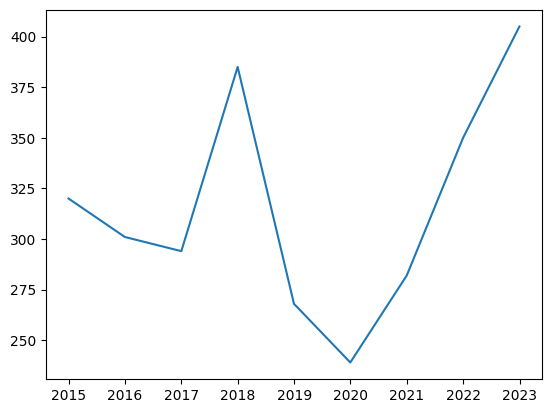

In [120]:
adds_count = arcom_df.loc[arcom_products.loc[[len(x) > 0 for x in arcom_products['off_indexes']]].index, 'Date'].value_counts().sort_index()
adds_count.index = pd.to_datetime(adds_count.index, format ="%d/%m/%Y")
adds_count = adds_count.resample('Y').sum()

plt.plot(adds_count)

In [46]:
arcom_df.loc[45380, 'Script']

'Voix homme : " COTE D\'OR  sélectionne ...\n ... les fèves de cacao à l\'arôme le plus intense.\n \n ... Pour révéler le goût authentique ...\n ... du chocolat.\n ... Et nos émotions les plus vraies.\n \n \n \n ... COTE D\'OR, ...\n ... le goût des vraies émotions. "\n \n ... Retrouvez tout le plaisir gourmand COTE D\'OR à partager avec les carrés COTE D\'OR. "'